# **Toronto 10-Day Weather Forecast: ETL and Visualisation**



### **Introduction**

In this notebook, we extract, transform, load (ETL) and analyse the 10-day weather forecast for Toronto using data from the Weather API. The analysis involves visualising various weather-related parameters to gain insights into temperature trends, precipitation, air quality and more.

### **Extracting Data from Weather API**
The first step involves extracting the 10-day weather forecast data for Toronto using the WeatherAPI. We import the necessary libraries, define the API endpoint URL and set the query parameters (including the API key, location and forecast duration). A GET request is sent to retrieve the forecast data and the data is processed to focus on hourly forecasts using a pandas DataFrame.

### **Data Transformation and Loading**
**Datetime Creation:** A new column 'datetime' has been created by concatenating the date and time columns, which helps in aligning the data for time-series analysis.

**Air Quality Data:** The 'air_quality' column, which contains nested JSON data, was split into individual columns for each air quality parameter (e.g., CO, O3, NO2).

**Data Display:** The transformed DataFrame was displayed to verify the structure and content of the data.



In [0]:
#Import the necessary libraries
import pandas as pd
import requests

# Define the API endpoint URL
url = "https://api.weatherapi.com/v1/forecast.json"

# Define the query parameters
params = {
    "key": "74402b963fbf4ad19a444545240308",
    "q": "toronto:canada",
    "days": 10,
    "aqi": "yes",
    "alerts": "yes"
}

# Send a GET request to the API endpoint
response = requests.get(url, params=params)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Extract the forecast data from the response
    forecast_data = response.json()
    
    # Create an empty list to store the hourly forecast
    hourly_forecast = []
    
    # Iterate over the forecast days
    for day in forecast_data['forecast']['forecastday']:
        # Get the date of the forecast day
        date = day['date']
        
        # Iterate over the hourly forecast for the day
        for hour in day['hour']:
            # Add the date and hour information to the hourly forecast
            hour['date'] = date
            hour['time'] = hour['time'].split()[1]  # Split the time from the date
            hourly_forecast.append(hour)
    
    # Convert the hourly forecast to a DataFrame
    df_hourly_forecast = pd.DataFrame(hourly_forecast)

    # Concatenate the 'date' and 'time' columns into a new column 'datetime'
    df_hourly_forecast['datetime'] = df_hourly_forecast['date'] + ' ' + df_hourly_forecast['time']
    
    # Split the 'air_quality' column into separate columns
    df_air_quality = df_hourly_forecast['air_quality'].apply(pd.Series)
    df_hourly_forecast = pd.concat([df_hourly_forecast, df_air_quality], axis=1)
    
    # Display the DataFrame
    display(df_hourly_forecast)
    
else:
    # Handle the case when the request was not successful
    print("Error: Failed to retrieve the forecast data")

/root/.ipykernel/1312/command-2467354889858227-1808374027:49: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_air_quality = df_hourly_forecast['air_quality'].apply(pd.Series)
/root/.ipykernel/1312/command-2467354889858227-1808374027:49: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_air_quality = df_hourly_forecast['air_quality'].apply(pd.Series)
/root/.ipykernel/1312/command-2467354889858227-1808374027:49: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_air_quality = df_hourly_forecast['air_quality'].apply(pd.Series)
/root/.ipykernel/1312/command-2467354889858227-1808374027:49: FutureWarning: The default dtype for empty Series will be '

time_epoch,time,temp_c,temp_f,is_day,condition,wind_mph,wind_kph,wind_degree,wind_dir,pressure_mb,pressure_in,precip_mm,precip_in,snow_cm,humidity,cloud,feelslike_c,feelslike_f,windchill_c,windchill_f,heatindex_c,heatindex_f,dewpoint_c,dewpoint_f,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph,uv,air_quality,date,datetime,co,no2,o3,so2,pm2_5,pm10,us-epa-index,gb-defra-index
1722657600,00:00,22.5,72.6,0,"List(1003, //cdn.weatherapi.com/weather/64x64/night/116.png, Partly Cloudy )",3.4,5.4,214,SW,1011.0,29.84,0.0,0.0,0.0,80,47,24.8,76.6,22.5,72.6,24.8,76.6,18.9,66.0,0,0,0,0,10.0,6.0,5.8,9.4,0.0,"List(854.5, 4, 63.8, 19.0, 45.7, 37.5, 9.3, 2)",2024-08-03,2024-08-03 00:00,854.5,63.8,19.0,9.3,37.5,45.7,2.0,4.0
1722661200,01:00,22.3,72.2,0,"List(1003, //cdn.weatherapi.com/weather/64x64/night/116.png, Partly Cloudy )",4.3,6.8,224,SW,1011.0,29.84,0.0,0.0,0.0,82,26,24.7,76.4,22.3,72.2,24.7,76.4,19.0,66.2,0,0,0,0,10.0,6.0,7.4,11.8,0.0,"List(727.7, 3, 43.2, 20.4, 40.1, 32.9, 5.0, 2)",2024-08-03,2024-08-03 01:00,727.7,43.2,20.4,5.0,32.9,40.1,2.0,3.0
1722664800,02:00,22.2,72.0,0,"List(1000, //cdn.weatherapi.com/weather/64x64/night/113.png, Clear )",3.8,6.1,255,WSW,1010.0,29.83,0.0,0.0,0.0,82,16,24.6,76.3,22.2,72.0,24.6,76.3,19.0,66.1,0,0,0,0,10.0,6.0,6.6,10.6,0.0,"List(560.8, 3, 23.3, 28.3, 31.1, 26.0, 2.4, 2)",2024-08-03,2024-08-03 02:00,560.8,23.3,28.3,2.4,26.0,31.1,2.0,3.0
1722668400,03:00,22.1,71.8,0,"List(1000, //cdn.weatherapi.com/weather/64x64/night/113.png, Clear )",4.0,6.5,285,WNW,1010.0,29.82,0.0,0.0,0.0,81,17,24.6,76.2,22.1,71.8,24.6,76.2,18.7,65.7,0,0,0,0,10.0,6.0,6.9,11.2,0.0,"List(407.2, 2, 8.7, 40.1, 19.3, 16.9, 1.3, 2)",2024-08-03,2024-08-03 03:00,407.2,8.7,40.1,1.3,16.9,19.3,2.0,2.0
1722672000,04:00,22.1,71.8,0,"List(1000, //cdn.weatherapi.com/weather/64x64/night/113.png, Clear )",3.4,5.4,293,WNW,1010.0,29.81,0.0,0.0,0.0,80,19,24.6,76.2,22.1,71.8,24.6,76.2,18.5,65.3,0,0,0,0,10.0,6.0,5.8,9.3,0.0,"List(343.8, 2, 4.7, 43.3, 13.5, 12.3, 1.0, 1)",2024-08-03,2024-08-03 04:00,343.8,4.7,43.3,1.0,12.3,13.5,1.0,2.0
1722675600,05:00,22.0,71.7,0,"List(1000, //cdn.weatherapi.com/weather/64x64/night/113.png, Clear )",2.0,3.2,288,WNW,1010.0,29.82,0.0,0.0,0.0,79,21,24.5,76.2,22.0,71.7,24.5,76.2,18.3,65.0,0,0,0,0,10.0,6.0,3.5,5.6,0.0,"List(323.8, 1, 4.3, 42.2, 11.7, 10.7, 1.1, 1)",2024-08-03,2024-08-03 05:00,323.8,4.3,42.2,1.1,10.7,11.7,1.0,1.0
1722679200,06:00,22.1,71.8,0,"List(1000, //cdn.weatherapi.com/weather/64x64/night/113.png, Clear )",2.0,3.2,275,W,1010.0,29.82,0.0,0.0,0.0,79,21,24.6,76.2,22.1,71.8,24.6,76.2,18.2,64.8,0,0,0,0,10.0,6.0,3.5,5.6,0.0,"List(320.4, 1, 5.0, 39.7, 11.1, 10.2, 1.3, 1)",2024-08-03,2024-08-03 06:00,320.4,5.0,39.7,1.3,10.2,11.1,1.0,1.0
1722682800,07:00,22.6,72.6,1,"List(1003, //cdn.weatherapi.com/weather/64x64/day/116.png, Partly Cloudy )",2.0,3.2,260,W,1010.0,29.83,0.0,0.0,0.0,79,27,24.8,76.7,22.6,72.7,24.8,76.7,18.4,65.1,0,0,0,0,10.0,6.0,3.4,5.4,6.0,"List(337.1, 1, 8.1, 33.6, 11.1, 10.0, 1.7, 1)",2024-08-03,2024-08-03 07:00,337.1,8.1,33.6,1.7,10.0,11.1,1.0,1.0
1722686400,08:00,23.3,74.0,1,"List(1003, //cdn.weatherapi.com/weather/64x64/day/116.png, Partly Cloudy )",1.8,2.9,211,SSW,1010.0,29.84,0.0,0.0,0.0,76,33,25.3,77.5,23.3,74.0,25.3,77.5,18.5,65.3,0,0,0,0,10.0,6.0,2.6,4.2,6.0,"List(377.2, 1, 12.7, 26.5, 11.5, 9.9, 2.3, 1)",2024-08-03,2024-08-03 08:00,377.2,12.7,26.5,2.3,9.9,11.5,1.0,1.0
1722690000,09:00,24.0,75.1,1,"List(1003, //cdn.weatherapi.com/weather/64x64/day/116.png, Partly Cloudy )",2.9,4.7,205,SSW,1010.0,29.84,0.0,0.0,0.0,71,48,25.7,78.3,24.0,75.1,25.7,78.3,18.6,65.4,0,0,0,0,10.0,6.0,3.8,6.2,6.0,"List(410.6, 1, 13.9, 26.5, 11.8, 9.7, 2.9, 1)",2024-08-03,2024-08-03 09:00,410.6,13.9,26.5,2.9,9.7,11.8,1.0,1.0


Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

### **Visualization of Weather Data**


**10-Day Hourly Temperature Forecast:** This visualization shows temperature trends over the 10-day period, highlighting hourly variations.

**Temperature Trends: Max, Min, Avg:** This combo line and bar graph displays the daily temperature extremes and averages, providing a clear overview of the temperature trends.

**Total Precipitation:** This Area graph presents the expected total precipitation for each day, helping to identify potential rainy days.

**Average UV Index:** This line graph shows the daily average UV index, which is crucial for assessing sun exposure risks.

**Temperature and Windspeed Scatter Plot:** A scatter plot was created to explore the relationship between temperature and wind speed.

**Heat Index Heatmap:** This heatmap visualizes the heat index across the 10 days, illustrating the perceived temperature due to humidity and air temperature.

**Air Quality Indices Boxplot:** A boxplot was created for air quality indices (CO, O3, NO2, SO2, PM2.5, PM10), allowing for a comparison of pollution levels over the forecast period.

## **Advanced Visualization: Dual Y-Axis Boxplot of Air Quality Indices**

Here, a dual y-axis boxplot has been created to analyse air quality indices over the first three days. CO and O3 levels are plotted on the left y-axis, while NO2, SO2, PM2.5 and PM10 levels are plotted on the right y-axis. Separate legends are provided for clarity. Adjustments are made to ensure that O3 levels are not obscured by PM10, ensuring all data points are visible.

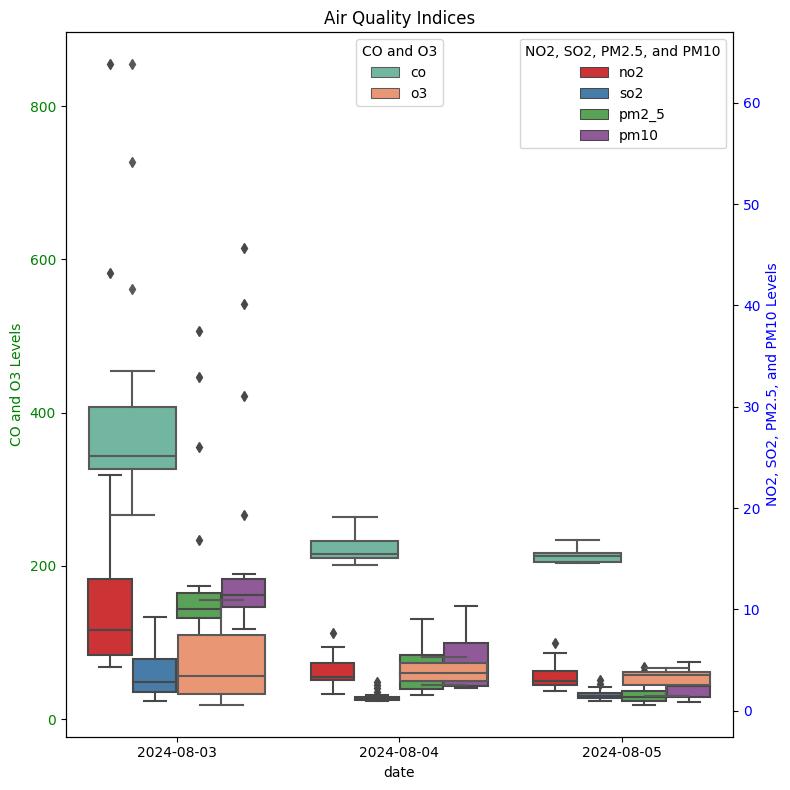

In [0]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for the first 3 dates
first_3_dates = df_hourly_forecast['date'].unique()[:3]
df_filtered = df_hourly_forecast[df_hourly_forecast['date'].isin(first_3_dates)]

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(8, 8))

# Plot CO and O3 on the left y-axis
sns.boxplot(x='date', y='value', data=df_filtered.melt(id_vars=['date'], value_vars=['co', 'o3']), hue='variable', ax=ax1, palette='Set2')
ax1.set_ylabel('CO and O3 Levels', color='g')
ax1.tick_params(axis='y', labelcolor='g')
# Extract the handles and labels for the first axis legend
handles1, labels1 = ax1.get_legend_handles_labels()

# Adjust the zorder to make sure O3 is visible over PM10
ax1.set_zorder(2)
ax1.patch.set_visible(False)  # Hide the 'ax1' fill to see 'ax2' plots

# Create a second y-axis for NO2, SO2, PM2.5, and PM10
ax2 = ax1.twinx()
sns.boxplot(x='date', y='value', data=df_filtered.melt(id_vars=['date'], value_vars=['no2', 'so2', 'pm2_5', 'pm10']), hue='variable', ax=ax2, palette='Set1')
ax2.set_ylabel('NO2, SO2, PM2.5, and PM10 Levels', color='b')
ax2.tick_params(axis='y', labelcolor='b')
# Extract the handles and labels for the second axis legend
handles2, labels2 = ax2.get_legend_handles_labels()

# Set the title
plt.title('Air Quality Indices')

# Place the legends on the plot
ax1.legend(handles1, labels1, loc='upper center', title='CO and O3')
ax2.legend(handles2, labels2, loc='upper right', title='NO2, SO2, PM2.5, and PM10')

fig.tight_layout()
plt.show()

### Conclusion

This notebook demonstrates the end-to-end process of extracting, transforming, loading and analysing a 10-day weather forecast for Toronto. By utilizing various visualizations, we gain valuable insights into temperature trends, air quality and other weather-related factors. The dual y-axis boxplot is particularly useful for analyzing multiple air quality indices simultaneously, providing a clear picture of environmental conditions over the forecast period.

